In [1]:
import requests
import pandas as pd

In [2]:
VACANCIES_API_URL = 'https://career.habr.com/api/frontend/vacancies?sort=relevance&type=all&divisions[]=backend&divisions[]=frontend&divisions[]=apps&divisions[]=software&divisions[]=testing&divisions[]=administration&divisions[]=analytics&divisions[]=security&divisions[]=support&divisions[]=other&currency=RUR&page={}'
TOTAL_PAGES = 157

In [3]:
def fetch_vacancies_from_page(url, page):
    response = requests.get(url.format(page)).json()
    if response.get('error'):
        print(response.get('error'))
        return None
    return response['list']

In [4]:
def collect_all_vacancies(url, pages):
    all_vacancies = []
    for page in range(pages):
        all_vacancies += fetch_vacancies_from_page(url, page)
    return all_vacancies

In [5]:
vacancies_data = collect_all_vacancies(VACANCIES_API_URL, TOTAL_PAGES)

In [6]:
# Сохраняем полученную информацию в файл habr_vacancies.json:

df = pd.DataFrame(vacancies_data)
df.to_json('habr_vacancies.json')

In [7]:
# И работаем с этим файлом:

vacancies = pd.read_json('habr_vacancies.json')
vacancies.head()

,id,href,title,isMarked,remoteWork,salaryQualification,publishedDate,location,company,employment,...,skills,media,locations,favorite,archived,hidden,can_edit,userVacancyBanHref,quickResponseHref,reactions
0,1000076910,/vacancies/1000076910,Frontend разработчик (React),False,True,"{'title': 'Старший (Senior)', 'href': '/vacanc...","{'date': '2024-11-02T10:05:22+03:00', 'title':...",NaN,"{'alias_name': 'itfb-group', 'href': '/compani...",full_time,...,"[{'title': 'React', 'href': '/vacancies/skills...",None,"[{'title': 'Москва', 'href': '/vacancies?city_...",False,False,False,False,/api/frontend/user_vacancy_bans,/api/frontend/quick_responses,"{'items': [{'name': 'arrow', 'title': 'arrow',..."
1,1000149410,/vacancies/1000149410,Testing Engineer (Services Integration),True,True,None,"{'date': '2024-11-01T23:01:03+03:00', 'title':...",NaN,"{'alias_name': 'kaspersky', 'href': '/companie...",None,...,"[{'title': 'Ручное тестирование', 'href': '/va...",None,None,False,False,False,False,/api/frontend/user_vacancy_bans,/api/frontend/quick_responses,"{'items': [{'name': 'arrow', 'title': 'arrow',..."
2,1000137862,/vacancies/1000137862,SDET Python (Апротех),True,True,None,"{'date': '2024-11-01T20:00:59+03:00', 'title':...",NaN,"{'alias_name': 'kaspersky', 'href': '/companie...",None,...,"[{'title': 'Python', 'href': '/vacancies/skill...",None,None,False,False,False,False,/api/frontend/user_vacancy_bans,/api/frontend/quick_responses,"{'items': [{'name': 'arrow', 'title': 'arrow',..."
3,1000142644,/vacancies/1000142644,Разработчик-исследователь (Research Developer)...,True,True,None,"{'date': '2024-11-01T20:00:59+03:00', 'title':...",NaN,"{'alias_name': 'kaspersky', 'href': '/companie...",None,...,[{'title': 'Разработка программного обеспечени...,None,None,False,False,False,False,/api/frontend/user_vacancy_bans,/api/frontend/quick_responses,"{'items': [{'name': 'arrow', 'title': 'arrow',..."
4,1000141920,/vacancies/1000141920,SDET (SD-WAN),True,True,None,"{'date': '2024-11-01T19:01:40+03:00', 'title':...",NaN,"{'alias_name': 'kaspersky', 'href': '/companie...",None,...,"[{'title': 'Ручное тестирование', 'href': '/va...",None,None,False,False,False,False,/api/frontend/user_vacancy_bans,/api/frontend/quick_responses,"{'items': [{'name': 'arrow', 'title': 'arrow',..."


In [8]:
# Сферы деятельности:

division_data = vacancies['divisions']
divisions = []
for division_list in division_data:
    for division in range(len(division_list)):
        divisions.append(division_list[division]['title'])
divisions = pd.Series(divisions)

print(divisions.value_counts())

Бэкенд разработчик                           28
Системный аналитик                           21
Фронтенд разработчик                         10
Инженер по автоматизации тестирования         9
Инженер по обеспечению качества               8
Фулстек разработчик                           7
Десктоп разработчик                           7
DevOps-инженер                                7
Разработчик мобильных приложений              6
Аналитик SOC                                  6
Разработчик приложений                        5
Системный администратор                       5
Инженер по данным                             5
Пресейл менеджер                              4
Инженер по ручному тестированию               4
Системный инженер                             4
Архитектор программного обеспечения           3
Офис менеджер                                 2
Инженер встраиваемых систем                   2
Администратор серверов                        2
Инженер по доступности сервисов         

<Axes: title={'center': 'Сферы деятельности в вакансиях (по данным «Хабр Карьеры»)\u200e'}>

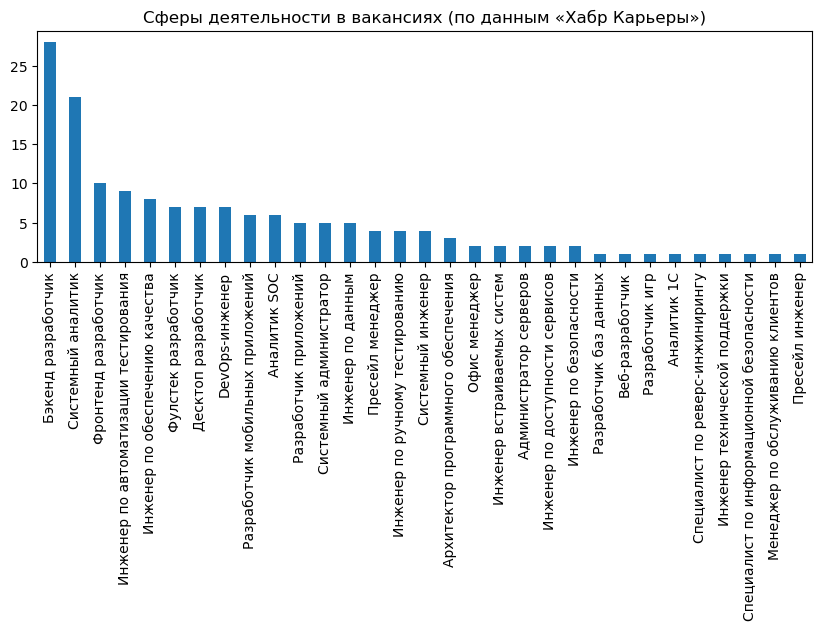

In [9]:
divisions.value_counts().plot(kind='bar',
                            figsize=(10, 3), 
                            title='Сферы деятельности в вакансиях (по данным «Хабр Карьеры»)‎')

In [10]:
# Скиллы:

skill_data = vacancies['skills']
skills = []
for skill_list in skill_data:
    for skill in range(len(skill_list)):
        skills.append(skill_list[skill]['title'])
skills = pd.Series(skills)

skills.value_counts()

SQL                                 25
Python                              22
PostgreSQL                          19
C++                                 19
JavaScript                          17
                                    ..
Oracle                               1
Oracle PL/SQL                        1
FPGA                                 1
Настройка и наладка оборудования     1
Клиент-серверные приложения          1
Name: count, Length: 175, dtype: int64

<Axes: title={'center': 'Топ-100 требуемых скиллов (по данным «Хабр Карьеры»)\u200e'}>

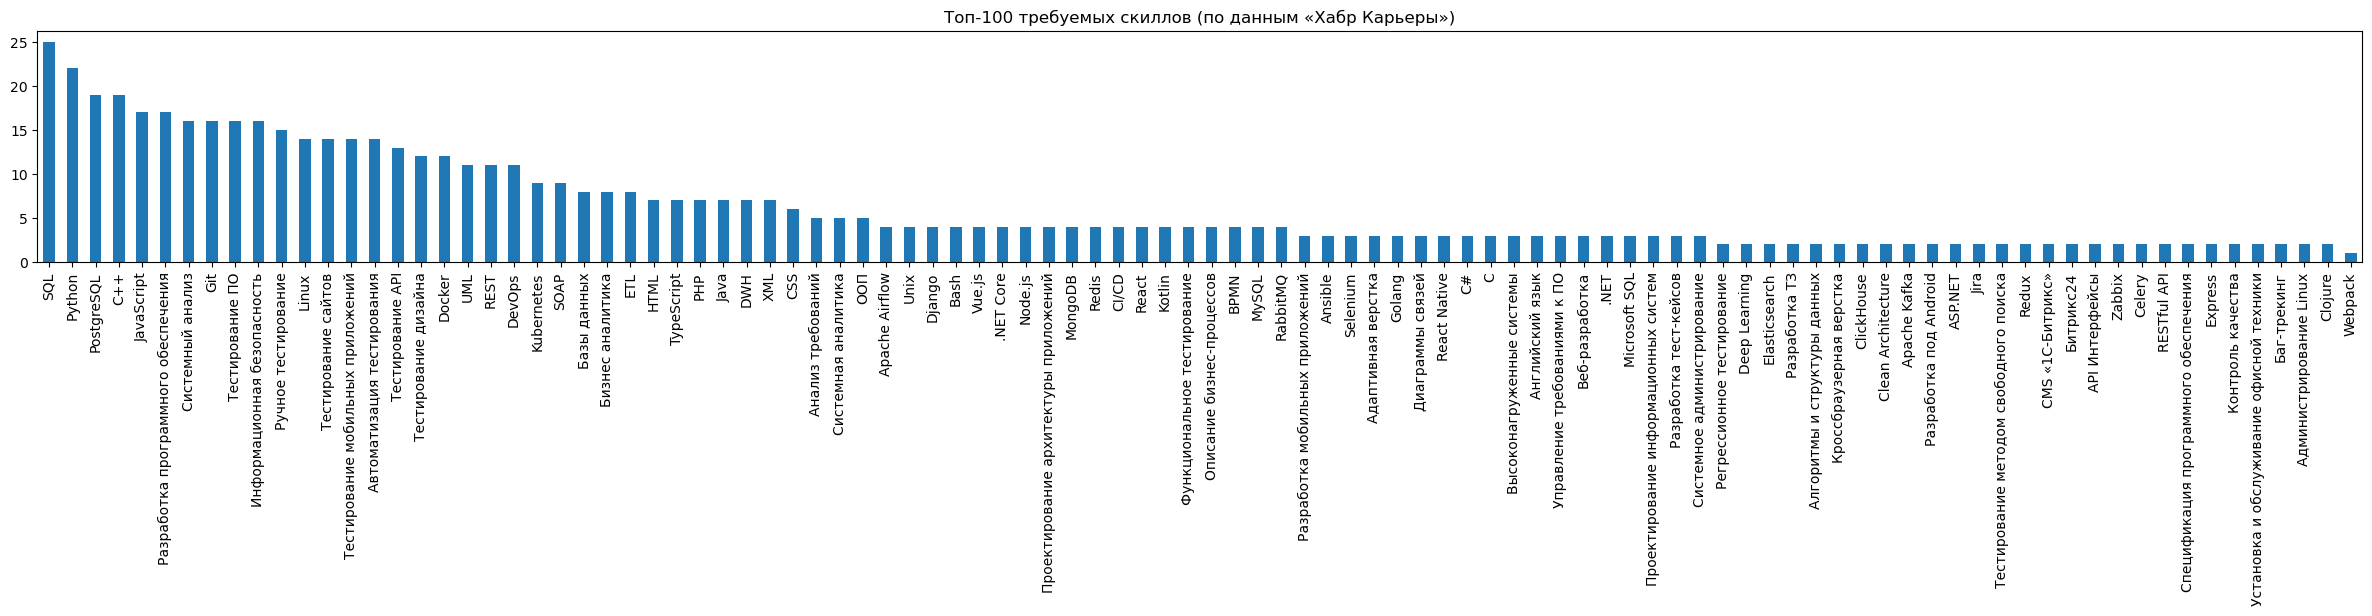

In [11]:
skills.value_counts().head(100).plot(kind='bar',
                               title='Топ-100 требуемых скиллов (по данным «Хабр Карьеры»)‎',
                               figsize=(30, 3), 
                               )

In [12]:
# Специальности:

job_titles = vacancies['title']
titles = pd.Series(job_titles)
titles.value_counts()

title
Системный аналитик                                          6
Business Data Engineer                                      3
Frontend разработчик (React)                                2
XDR analyst                                                 2
Testing Engineer (Services Integration)                     2
                                                           ..
Senior Security Assessment Specialist                       1
System Administrator Helpdesk                               1
Partner Technical Account Manager                           1
Fullstack Developer Python/TypeScript (KasperskyOS)         1
Flutter/Django FullStack Developer / Фулстек разработчик    1
Name: count, Length: 126, dtype: int64

<Axes: title={'center': 'Топ-100 востребованных специальностей (по данным «Хабр Карьеры»)'}, xlabel='title'>

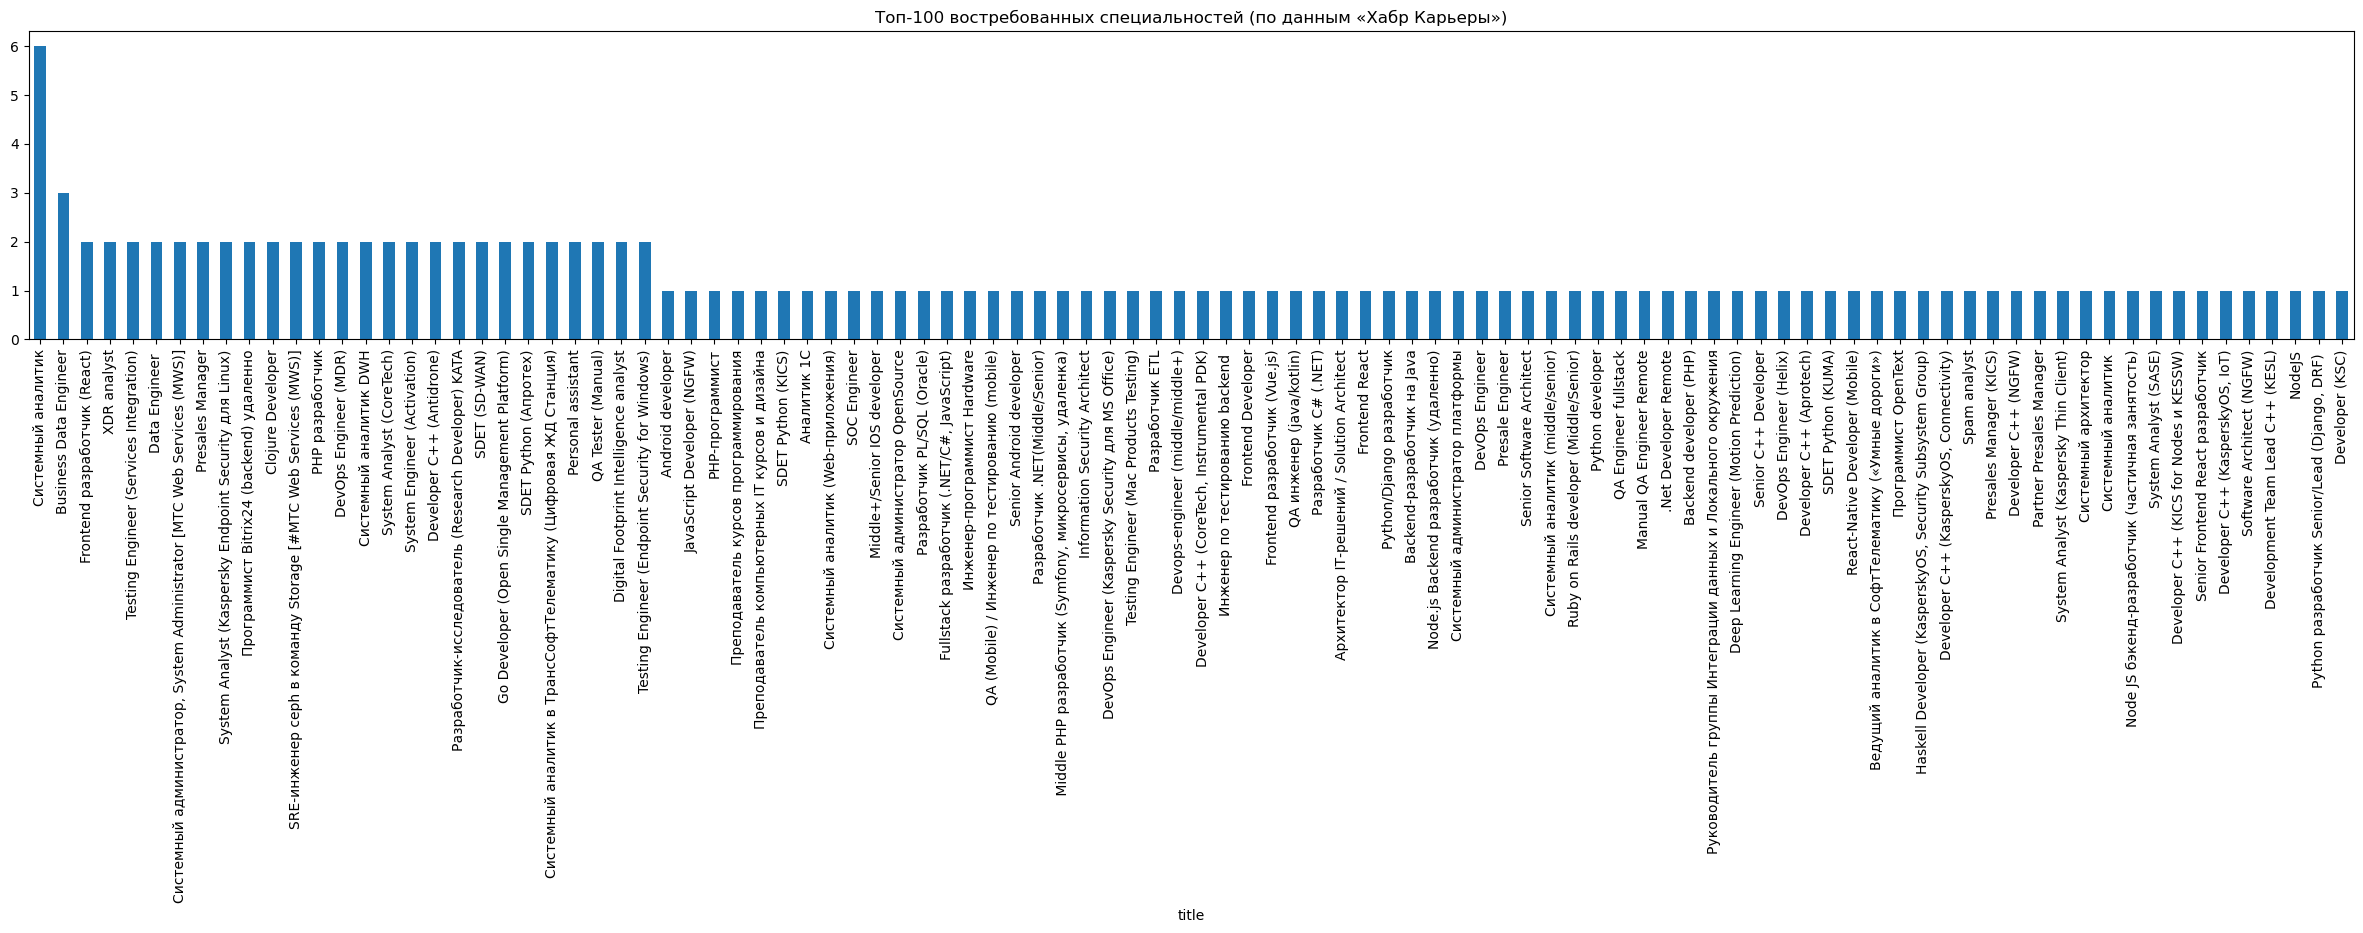

In [13]:
titles.value_counts().head(100).plot(kind='bar',
                                    figsize=(30, 4), 
                                    title='Топ-100 востребованных специальностей (по данным «Хабр Карьеры»)')

In [14]:
# Удалённая работа:

remote_work = vacancies['remoteWork']
remote = pd.Series(remote_work)
remote_work_percentage = round(remote.sum() / remote.count() * 100)

print(f'Удалённая работа: {remote_work_percentage} % (по данным «Хабр Карьеры». Данные на основе {remote.count()} IT-вакансий)')

Удалённая работа: 86 % (по данным «Хабр Карьеры». Данные на основе 158 IT-вакансий)
